In [1]:
### The following 3 imports expand the useable area of the notebook
### Adjust percents to make bigger or smaller
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
display(HTML("<style>.output_result { max-width:80% !important; }</style>"))
#display(HTML("<style>.prompt { display:none !important; }</style>"))

### the following import should let outputs scroll if they are too wide
from IPython.display import display, HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

# important geophysical imports
# I use several methods to load packages as examples

from iovsp.segyin import readsegyio3
from iovsp.segyout import write_segyio

from plotvsp.seisplots import wiggle_plot, four_plots
from procvsp.geometry import importascii, geovel

# Best method is the one below, you always know where functions are 
# coming from
import procvsp.spec as specvsp
import procvsp.sigproc as sgp
import procvsp.utils as utilvsp
#%matplotlib inline

## Load the VSP SEG-Y file  

 - uses segyio data loading package
 - source and receiver locations are assumed to be in SEG-Y trace headers
 - user needs to supply basic geometry parameters
      - seismic replacement velocity
      - surface seismic datum elevation
      - drill floor elevation
      - source elevation

In [2]:
#################### get the ZVSP SEGY filename ############################
    
#    filename = ('C:\\Users\\acampbell45\\Documents\\Python_Scripts'
#        '\\Synthetic_data\\data\\zvsp_z_fd_mod6_12p5ft_grid_delayed.sgy')

filename = ('data\\zvsp_z_fd_mod6_12p5ft_grid_delayed.sgy')
    
################### input desired geometry parameters ######################

RepVel= 5000     # replacement velocity
SRD_ASL = 0    # SRD elevation above sea level
DF_ASL = 0    # drill floor elevation ASL
SrcElev = -10   # source elevation ASL

###################### run basic segy loading functions #################### 
    
file_head = 'y'         # print binary and text header to screen    
pr_thead = 'y'          # print a table of trace headers    
data, numsamp, samprate, fs, theader =  readsegyio3(filename, file_head, 
                                            DF_ASL, SrcElev, SRD_ASL, pr_thead)

	JobID                   0          
	LineNumber              0          
	ReelNumber              0          
	Traces                  1          
	AuxTraces               0          
	Interval                1000       
	IntervalOriginal        0          
	Samples                 3050       
	SamplesOriginal         0          
	Format                  5          
	EnsembleFold            0          
	SortingCode             0          
	VerticalSum             0          
	SweepFrequencyStart     0          
	SweepFrequencyEnd       0          
	SweepLength             0          
	Sweep                   0          
	SweepChannel            0          
	SweepTaperStart         0          
	SweepTaperEnd           0          
	Taper                   0          
	CorrelatedTraces        0          
	BinaryGainRecovery      0          
	AmplitudeRecovery       0          
	MeasurementSystem       2          
	ImpulseSignalPolarity   0          
	VibratoryPolarity       0          
	

## Velocity Calculations  
 - Calculate interval velocities. Shallowest velocity is calculated separately and tacked on to velocity array  
 - Generate a version which is rounded and truncated for display as text

In [3]:
############ geometry corrections and velocity calculations 
    
table = 'y'     # print a time-depth-velocity listing to screen y or n    
vel_headers = geovel( theader, RepVel, table)
    


̲G̲e̲o̲v̲e̲l̲ ̲S̲t̲a̲t̲s̲ ̲:
 Theader shape (320, 15) Vheader shape: (320, 17)
 TVD_SRD shape : (320,)  IntVel shape : (320,)
 TVDSrc 2 vals   [ 90. 140.] 
 TVDSRD 2 vals  [100. 150.] 
 TTVert 2 vals   [10.902 17.332]
╒═════════════╤═════════════════╤═══════════╤═══════════╤══════════╕
│   Depth SRD │   Vert Time SRD │   Delta T │   Delta Z │       Vp │
╞═════════════╪═════════════════╪═══════════╪═══════════╪══════════╡
│         100 │          10.902 │  0.010902 │       100 │  9172.63 │
├─────────────┼─────────────────┼───────────┼───────────┼──────────┤
│         150 │          17.332 │  0.00643  │        50 │  7776.05 │
├─────────────┼─────────────────┼───────────┼───────────┼──────────┤
│         200 │          23.662 │  0.00633  │        50 │  7898.89 │
├─────────────┼─────────────────┼───────────┼───────────┼──────────┤
│         250 │          30.462 │  0.0068   │        50 │  7352.94 │
├─────────────┼─────────────────┼───────────┼───────────┼──────────┤
│         300 │       

  Trc      Rcv      Rcv    Rcv X    Rcv Y    Src X    Src Y    Src Z      Obs      TVD     TVD     SrcZ    ILN    FFID    Src      TWT    Int Vel.
  Num       MD      TVD                                                  Time     Dpth     SrcZ     SRD                            Src
-----  -------  -------  -------  -------  -------  -------  -------  -------  -------  -------  ------  -----  ------  -----  -------  ----------
    1    100.0    100.0      0.0      0.0      0.0      0.0     10.0    10.90    100.0     90.0   -10.0      1      11      0    21.80        9173
    2    150.0    150.0      0.0      0.0      0.0      0.0     10.0    17.33    150.0    140.0   -10.0      1      11      0    34.66        7776
    3    200.0    200.0      0.0      0.0      0.0      0.0     10.0    23.66    200.0    190.0   -10.0      1      11      0    47.32        7899
    4    250.0    250.0      0.0      0.0      0.0      0.0     10.0    30.46    250.0    240.0   -10.0      1      11      0    6

## Chose the desired trace range to process

In [4]:
############ trim arrays by receiver  

first_rcv =20
last_rcv = 220    
data_edit, theader_edit = utilvsp.depthlimit(data,vel_headers, first_rcv, last_rcv)


̲D̲e̲p̲t̲h̲l̲i̲m̲i̲t̲ ̲S̲t̲a̲t̲s̲ ̲:
 data shape :  (320, 3050)  data dtype :  float32
 headers shape : (320, 17)
 first : 19  last :  219
 headers new shape : (200, 17)
 data new shape :  (200, 3050)


## Make a wiggle plot of raw data  

pol : n for normal or tape polarity, r to flip polarity  
spacing : 'z' is spread traces by receiver depth, else traces are evenly spaced  
skiplabel : plot every nth recever depth label at bottom of plot  
fs : sample rate in hertz, may be set elsewhere in notebook    
norm : plot trace normalization 'n' or 'y' 
scal : multiply every sample by this number to heat or cool plot  
info_wig : print diagnostic information to terminal  
timframe: 'owt' is one-way time, 'twt' is two-way time, 'flat' is flattened using a  
reference time, usually the downgoing direct arrival pick


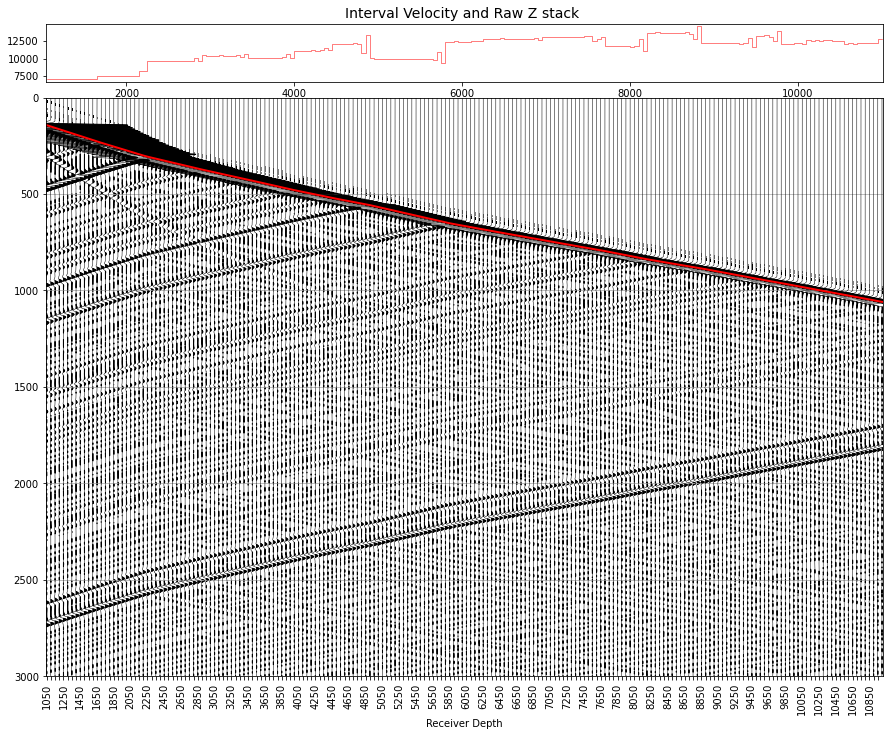


̲W̲i̲g̲g̲l̲e̲ ̲P̲l̲o̲t̲ ̲G̲l̲o̲b̲a̲l̲ ̲I̲n̲f̲o̲r̲m̲a̲t̲i̲o̲n̲ ̲:
 Number of traces in plot : 200  Number of samples per trace : 3050
 VSPdata type : float32
 datascaled shape [0] 200  datascaled shape [1] 3050
 thead shape : (200, 17)
 Min TVDSRD - pad 1040.0  Pad : 10
 Max TVDSRD + pad 11010.0  Pad : 10
 min max intvel : 7082.152974504239 14577.25947521847


In [5]:
############ first plot of wiggles and velocities 

plot_params = {"pol":'n', 
               "Tmax":3000, "Tmin":0, 
                "first_rcv":first_rcv, 
                "spacing":'z', 
                "skiplabel":4, 
                "fs":fs, 
                "norm":'n',
                "scal":100000000000, 
                "title_top":'Raw Z stack ',
                "info_wig":'y',
                "timframe":'owt'} 
wiggle_plot(theader_edit,data_edit, **plot_params)        

## Geometric spreading

In [14]:
def tar(VSP, thead, fs, exp):
    # Apply geometric spreading correction in the form of
    # T**exp
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    print("\u0332".join('\nTAR Parameters :'))

    numsamp = VSP.shape[1]
    time =  np.arange(0,numsamp*(1000/fs),(1000/fs))    

    gainfunc = time**exp
    gainfunc = gainfunc.reshape(1,-1)
    
    tarred = VSP*gainfunc
    print (' VSP.shape :', VSP.shape,' gainfunc.shape :', gainfunc.shape)
    
    plt.figure(figsize=(15,7))    
    ax1 = plt.subplot(111)
    
    ax1.plot(time, gainfunc.reshape(-1,1), c = 'red')  # using fftfreq to get x axis    
    ax1.set_title('T**%s Gain Function'%(exp))   
    ax1.set_xlabel('Time(ms)')    
    ax1.xaxis.grid()    
    ax1.yaxis.grid()
    plt.show()
    
    return tarred
    



̲T̲A̲R̲ ̲P̲a̲r̲a̲m̲e̲t̲e̲r̲s̲ ̲:
 VSP.shape : (200, 3050)  gainfunc.shape : (1, 3050)


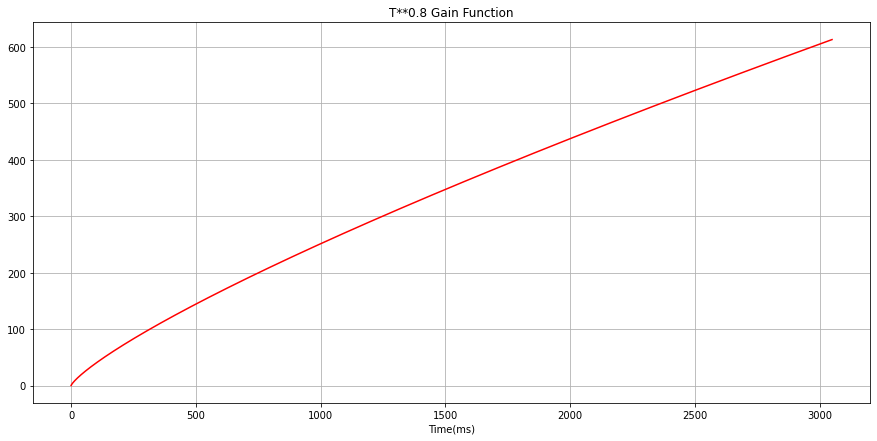

In [17]:
tarVSP = tar(data_edit,theader_edit,fs,.8 )

## Make a wiggle plot of gain corrected data  

pol : n for normal or tape polarity, r to flip polarity  
spacing : 'z' is spread traces by receiver depth, else traces are evenly spaced  
skiplabel : plot every nth recever depth label at bottom of plot  
fs : sample rate in hertz, may be set elsewhere in notebook    
norm : plot trace normalization 'n' or 'y' 
scal : multiply every sample by this number to heat or cool plot  
info_wig : print diagnostic information to terminal  
timframe: 'owt' is one-way time, 'twt' is two-way time, 'flat' is flattened using a  
reference time, usually the downgoing direct arrival pick


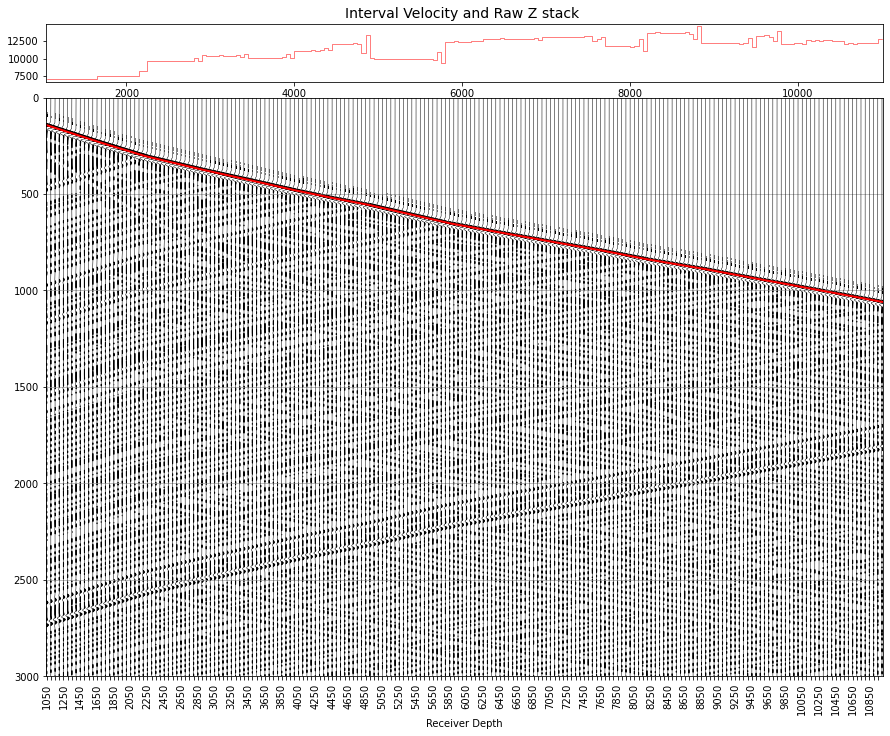


̲W̲i̲g̲g̲l̲e̲ ̲P̲l̲o̲t̲ ̲G̲l̲o̲b̲a̲l̲ ̲I̲n̲f̲o̲r̲m̲a̲t̲i̲o̲n̲ ̲:
 Number of traces in plot : 200  Number of samples per trace : 3050
 VSPdata type : float64
 datascaled shape [0] 200  datascaled shape [1] 3050
 thead shape : (200, 17)
 Min TVDSRD - pad 1040.0  Pad : 10
 Max TVDSRD + pad 11010.0  Pad : 10
 min max intvel : 7082.152974504239 14577.25947521847


In [18]:
############ first plot of wiggles and velocities 

plot_params = {"pol":'n', 
               "Tmax":3000, "Tmin":0, 
                "first_rcv":first_rcv, 
                "spacing":'z', 
                "skiplabel":4, 
                "fs":fs, 
                "norm":'n',
                "scal":100000000, 
                "title_top":'Raw Z stack ',
                "info_wig":'y',
                "timframe":'owt'} 
wiggle_plot(theader_edit,tarVSP, **plot_params)        

## Trace normalize data file  
 Remove transmission effects and uncorrected gain effects  
 on downgoing by normalizing the downgoing amplitudes  
 - normalize by row (receiver) using Frobenius normalization. Can be changed to other norms.  
 - Be careful with axis number, determines trace normalization or time normalization



 row_sums shape (200,)


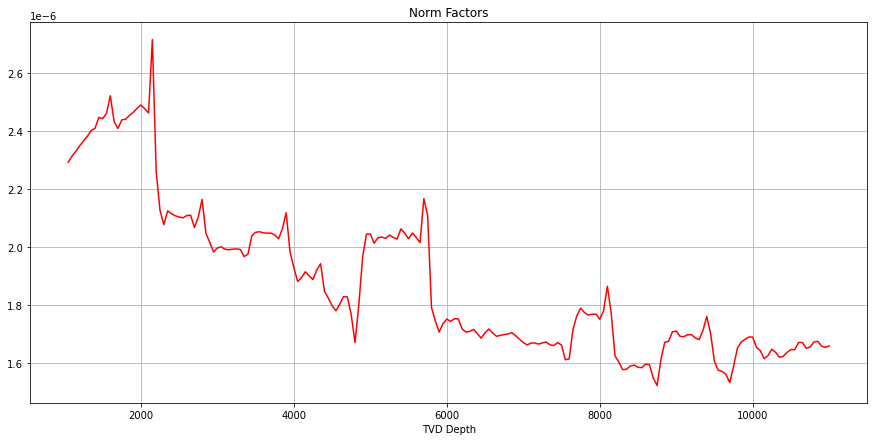

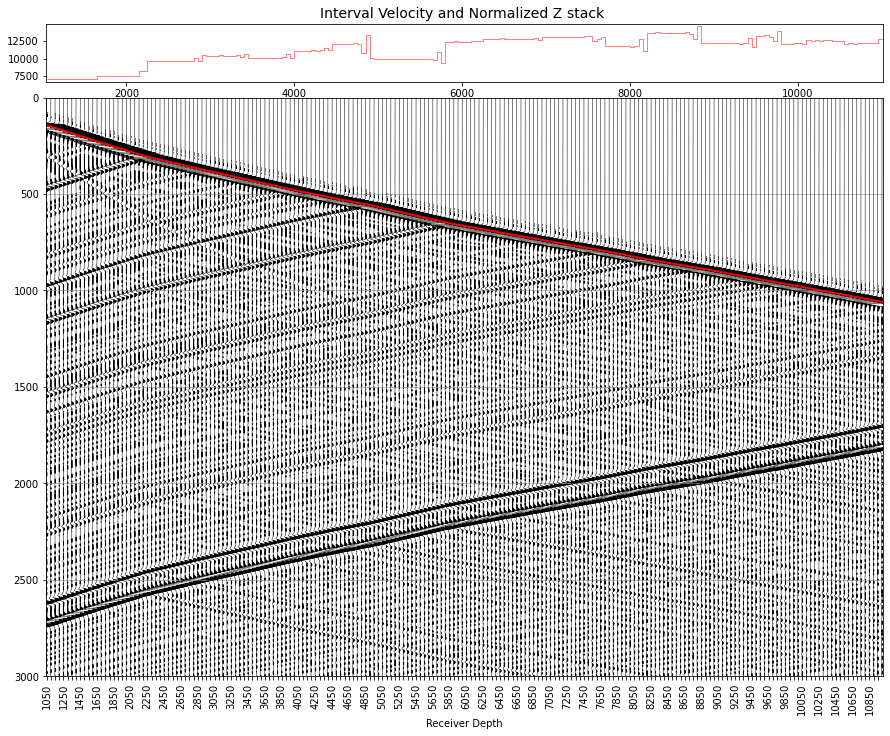

In [19]:
############  apply trace normalization if requested 

Data_norm = 'y'         # normalize data, n for gather norm, y for trace nrm
DScalar = 1             # usually 1, may be removed in future    
normed_edit = sgp.normalize(tarVSP, Data_norm, theader_edit, DScalar)

plot_params = {"pol":'n', 
                "Tmax":3000, "Tmin":0, 
                 "first_rcv":first_rcv, 
                 "spacing":'z', 
                 "skiplabel":4, 
                 "fs":fs, 
                "norm":'n',
                "scal":1000, 
                "title_top":'Normalized Z stack ',
                "info_wig":'n',
                "timframe":'owt'} 
wiggle_plot(theader_edit,normed_edit, **plot_params)                     

## Static shift to flatten (align) traces at the direct arrival 

Shifts by a time header value.  
Arbitrary time can be used to flatten (align) data at.  

Ultimate goal is to flatten the downgoing arrival to allow a median filter  
to enhance the downgoing data


̲S̲h̲i̲f̲t̲i̲n̲g̲ ̲P̲a̲r̲a̲m̲e̲t̲e̲r̲s̲ ̲:
 fs : 1000.0 
  atime : 250 
  first arr2 shape : (200, 3050)


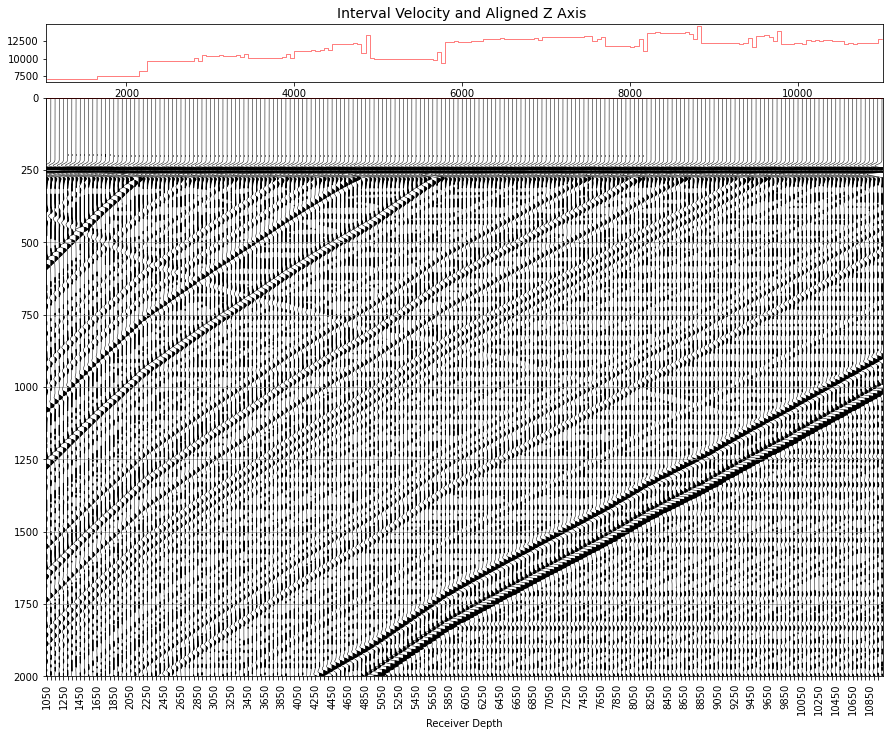

In [20]:
########### align downgoing by shifting traces ################################################
 
updown = 'down' # down to align downgoing at aligntime, up to shift to TWT, 
                    # unalign to shift from aligned at aligntime to 1WT    
aligntime = 250 # align downgoing at 500ms    
alignedVSP, theader_sh = utilvsp.shift(normed_edit, theader_edit, updown, aligntime, 
                                   fs)    
plot_params = {"pol":'n', 
                "Tmax":2000, "Tmin":0, 
                "first_rcv":first_rcv, 
                "spacing":'z', 
                "skiplabel":4, 
                "fs":fs, 
                "norm":'n',
                "scal":1000, 
                "title_top":'Aligned Z Axis ',
                "info_wig":'n',
                "timframe":'flat'} 
wiggle_plot(theader_edit,alignedVSP, **plot_params)               



## Median Filter to enhance the aligned downgoing waves  
Run the median filter across the traces, at equal sample times.  
 - Repeat for every time step  
 - Median will reject anomolous amplitudes and preserve the continuous amplitudes
  - The reflections are anomalous in a carefully chosen trace window  
  
The trace window is chosen:
 - to avoid smoothing (too long) or
 - ineffective noise rejection( too short)  
 
Usually subtract the enhanced downgoing from the raw data to get the upgoing


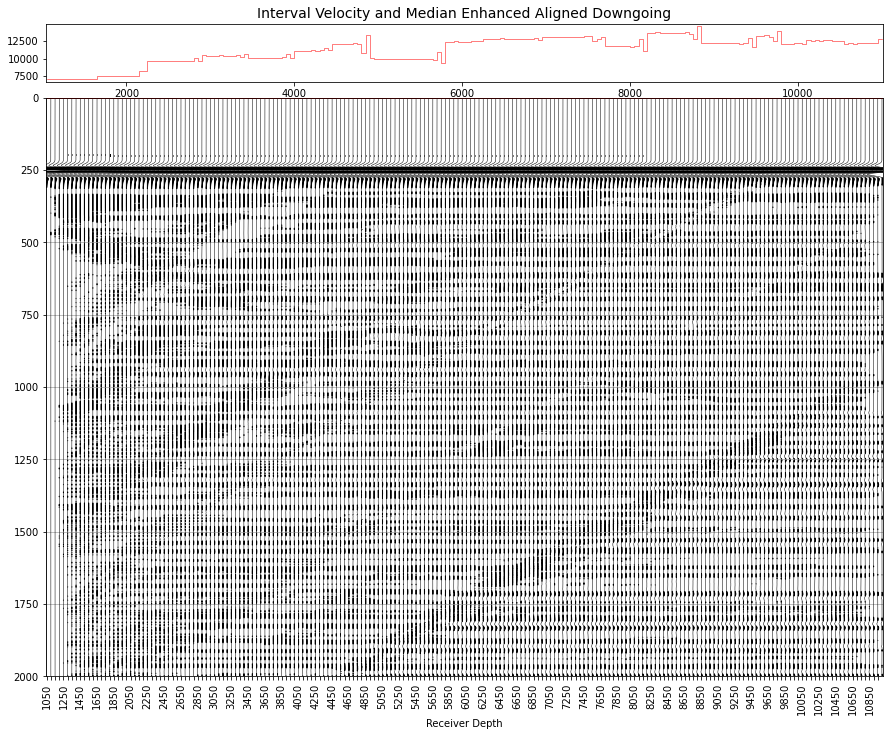

In [21]:
########### median filter to enhance the downgoing ###############################################
    
levels = 15
aligndown_scipy = sgp.medfilt(alignedVSP, levels) # pad with zeros
    
plot_params = {"pol":'n', 
                "Tmax":2000, "Tmin":0, 
                "first_rcv":first_rcv, 
                "spacing":'z', 
                "skiplabel":4, 
                "fs":fs, 
                "norm":'n',
                "scal":1000, 
                "title_top":'Median Enhanced Aligned Downgoing',
                "info_wig":'n',
                "timframe":'flat'} 
wiggle_plot(theader_edit,aligndown_scipy, **plot_params)               

## Difference the downgoing and raw data  
Raw data has had normalization applied  
Subtracting the downgoing from the raw data should leave upgoing waves  
 - other waves not aligned with the down P could also be left in the difference data
   - tube waves, shear waves are examples

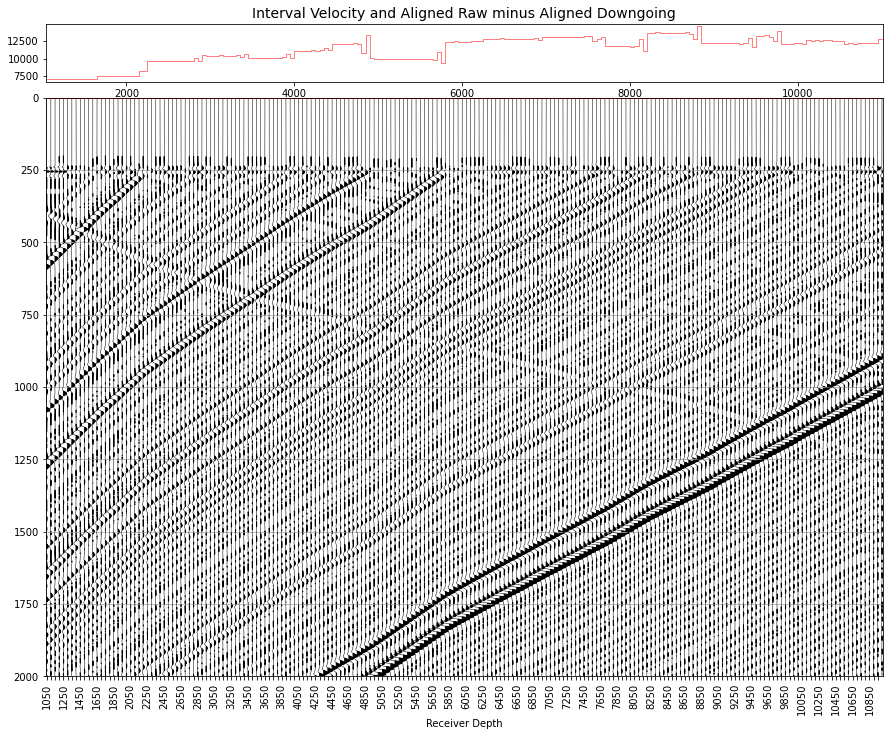

In [22]:
###### subtract the aligned downgoing from the aligned and normalized raw data

residual = utilvsp.diff(alignedVSP, aligndown_scipy)

plot_params = {"pol":'n',
                "Tmax":2000, "Tmin":0, 
                "first_rcv":first_rcv, 
                "spacing":'z', 
                "skiplabel":4, 
                "fs":fs, 
                "norm":'n',
                "scal":1000, 
                "title_top":'Aligned Raw minus Aligned Downgoing',
                "info_wig":'n',
                "timframe":'flat'} 
wiggle_plot(theader_edit,residual, **plot_params)        

## Static shift back to observed time 


̲S̲h̲i̲f̲t̲i̲n̲g̲ ̲P̲a̲r̲a̲m̲e̲t̲e̲r̲s̲ ̲:
 fs : 1000.0 
  atime : 250 
  first arr2 shape : (200, 3300)


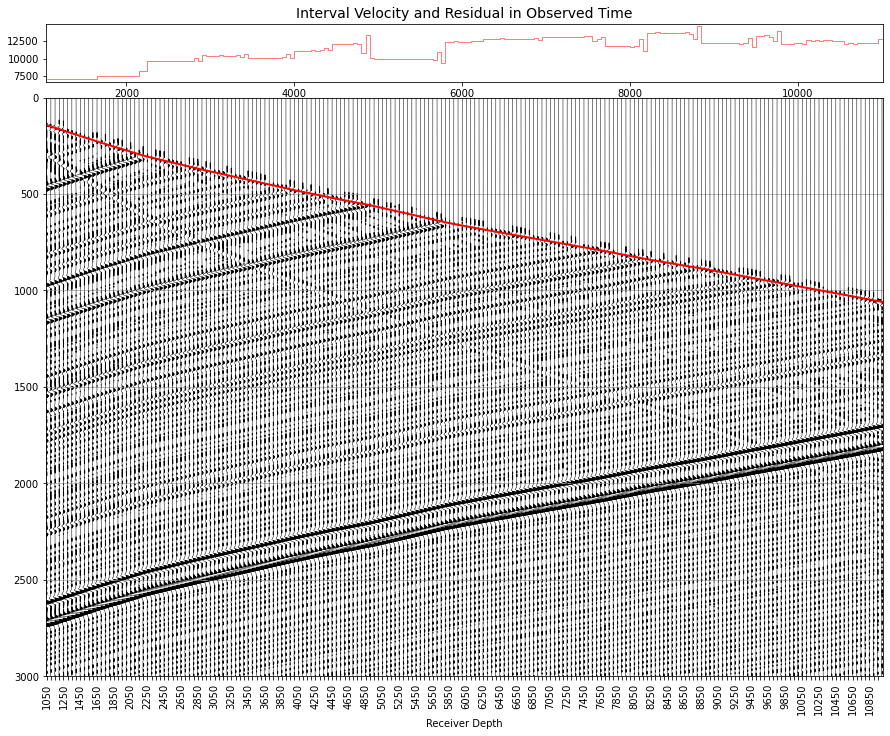

In [23]:
##### shift the data back to observed time frame

updown = 'unalign'

upwave1WT, theader_sh = utilvsp.shift(residual, theader_edit, updown, aligntime,fs)

plot_params = {"pol":'n',
                "Tmax":3000, "Tmin":0, 
                "first_rcv":first_rcv, 
                "spacing":'z', 
                "skiplabel":4, 
                "fs":fs, 
                "norm":'n',
                "scal":1000, 
                "title_top":'Residual in Observed Time',
                "info_wig":'n',
                "timframe":'owt'} 
wiggle_plot(theader_edit,upwave1WT, **plot_params)   

## Static shift to two-way time 
Zero-offset VSP geometry makes it trivial to convert from observed time to two-way time
 - shift each trace by it's measured arrival time is all that is needed  
 
Now the upgoing waves are flattened (aligned)


̲S̲h̲i̲f̲t̲i̲n̲g̲ ̲P̲a̲r̲a̲m̲e̲t̲e̲r̲s̲ ̲:
 fs : 1000.0 
  atime : 250 
  first arr2 shape : (200, 3300)
 pad twt :  2242  arr shape : (200, 5542)
 second arr2 shape : (200, 5542)


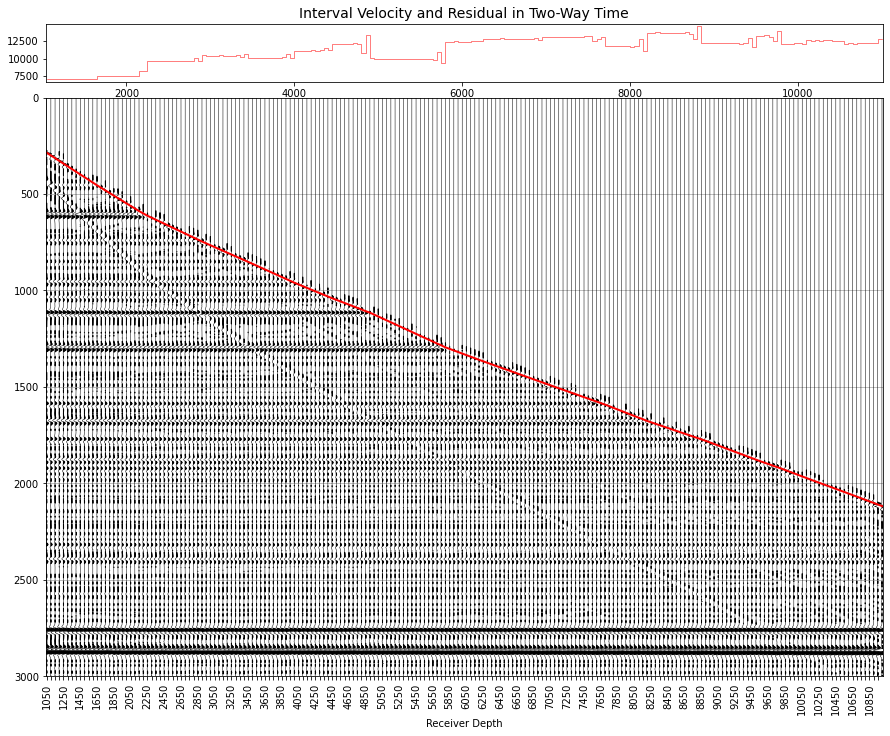

In [24]:
##### now shift from observed time frame to two-way time
updown = 'up'     

upwave2WT, theader_2wt = utilvsp.shift(upwave1WT, theader_edit, updown, aligntime, 
                                  fs)    
plot_params = {"pol":'n',
                "Tmax":3000, "Tmin":0, 
                "first_rcv":first_rcv, 
                "spacing":'z', 
                "skiplabel":4, 
                "fs":fs, 
                "norm":'n',
                "scal":1000, 
                "title_top":'Residual in Two-Way Time',
                "info_wig":'n',
                "timframe":'twt'} 
wiggle_plot(theader_edit,upwave2WT, **plot_params)   

## Median Filter to enhance the aligned upgoing waves  
Run the median filter across the traces, at equal sample times.  
 - Repeat for every time step  
 - Median will reject anomolous amplitudes and preserve the continuous amplitudes
  - noise spikes, shear waves, tube waves are anomalous in a carefully chosen trace window  
  
The trace window is chosen:
 - to avoid smoothing (too long) or
 - ineffective noise rejection( too short) 
A mute prior to the arrival time (two-way) may be required due to edge effects


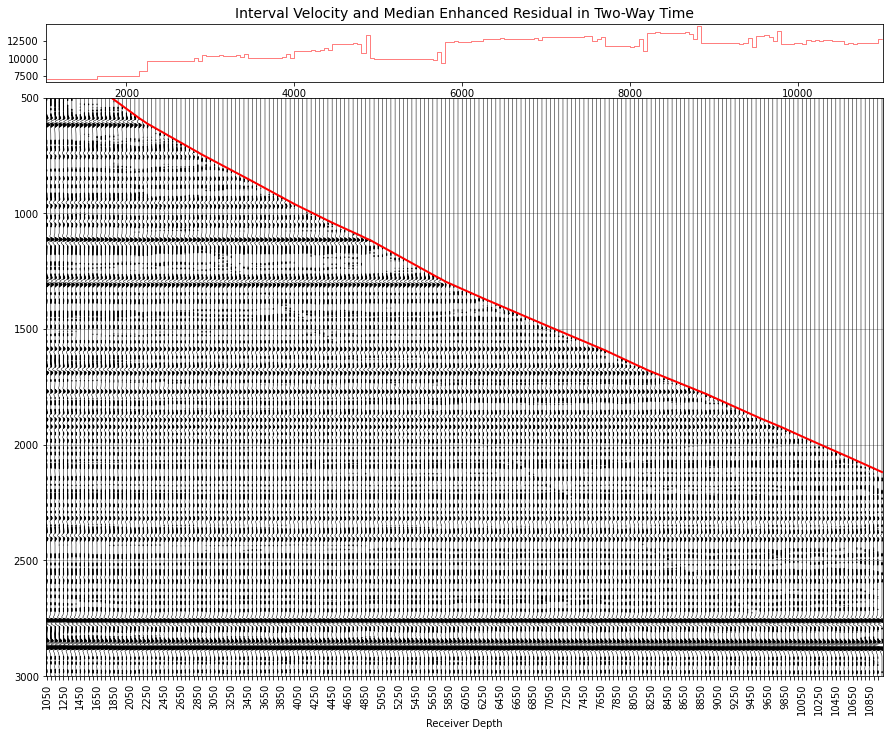

In [25]:
##### apply a median fiter across the traces to enhance the upgoing waves
# 1.Used to reduce noise. Maybe applied before or after decon
# 2. Apply a mute to reduce filter noise at direct arrival

levels = 5    
medianup2WT = sgp.medfilt(upwave2WT, levels)

tframe = 'twt' # owt or twt    
mute_medianup2WT = utilvsp.mute(medianup2WT,fs, theader_edit, tframe)

plot_params = {"pol":'n', 
                "Tmax":3000, "Tmin":500, 
                "first_rcv":first_rcv, 
                "spacing":'z', 
                "skiplabel":4, 
                "fs":fs, 
                "norm":'n',
                "scal":1000, 
                "title_top":'Median Enhanced Residual in Two-Way Time',
                "info_wig":'n',
                "timframe":'twt'} 
wiggle_plot(theader_edit,mute_medianup2WT, **plot_params)               

# Frequency Analysis  
A Tukey window is applied to the input trace, prior to FFT  


̲F̲r̲A̲n̲ ̲P̲a̲r̲a̲m̲e̲t̲e̲r̲s̲ ̲:
fs : 1000.0


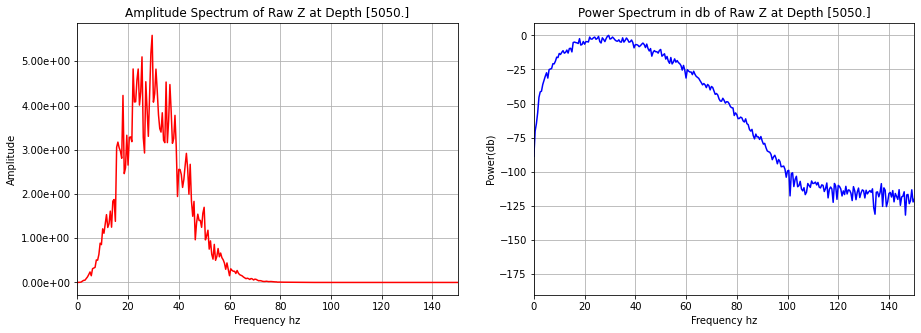

In [26]:
#########  FRequency ANalysis  
trace = 80
time_win = 'y' # window trace prior to fft
time_range = [0, 2000]
freq_range = [0, 150]    
title_fran = 'Raw Z'    
specvsp.spec_1d(normed_edit, time_range, freq_range, theader_edit, trace, fs, 
         time_win, title_fran)

## Example of Applying a Band-Pass( Butterworth) Filter  
 - Make 2 simple QC plots of frequency and impulse response
 - Plot the filtered VSP

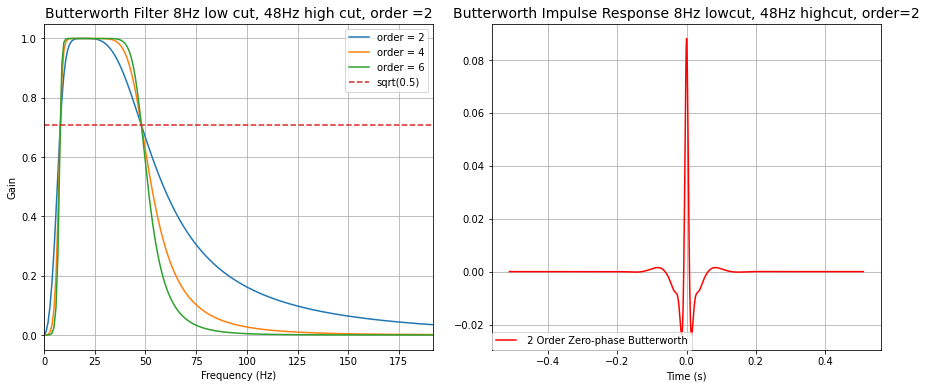

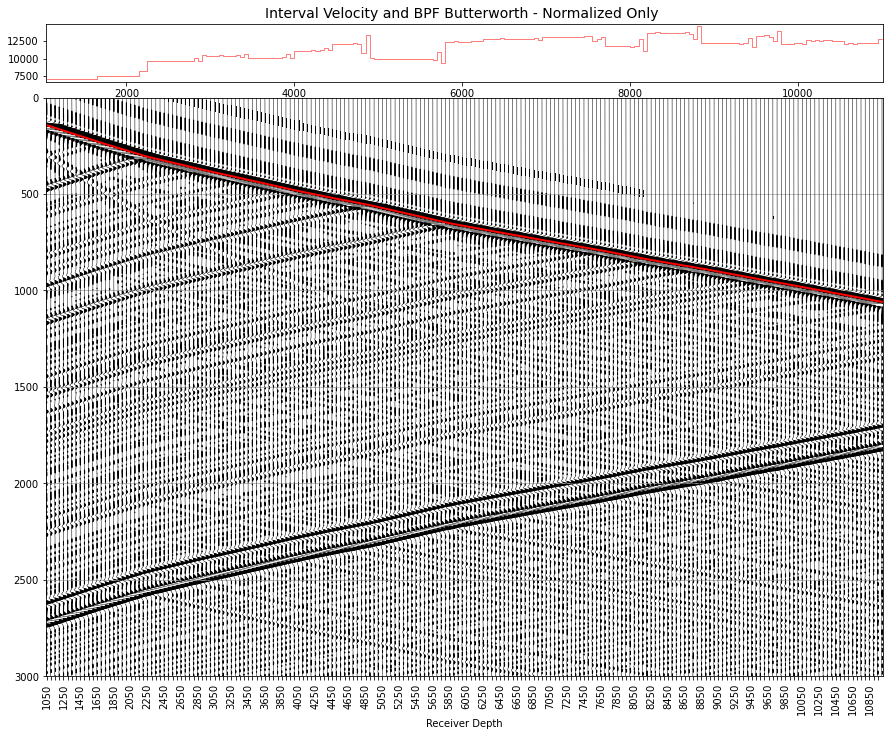

In [27]:
################### Apply a band-pass filter 
# Uses a Butterworth filter    
# Sample rate and desired cutoff frequencies (in Hz).

lowcut =8
highcut = 48    
qcplot = 'y'
order  = 2     # order gets doubled by implementation of filter, be careful    
numfsamp = 1024   # for wavelet QC plot, must be even      
buttfilt = specvsp.bandpass_filter(normed_edit, lowcut, highcut, fs, order, 
                                      numfsamp, qcplot)

plot_params = {"pol":'n', 
                "Tmax":3000, "Tmin":0, 
                "first_rcv":first_rcv, 
                "spacing":'z', 
                "skiplabel":4, 
                "fs":fs, 
                "norm":'n',
                "scal":1000, 
                "title_top":'BPF Butterworth - Normalized Only ',
                "info_wig":'n',
                "timframe":'owt'} 
wiggle_plot(theader_edit,buttfilt, **plot_params)                   

## Alternate Processing Flow Plot - Four Boxes  
A nice compact plot showing all processing steps  
 - plots D and E are the same, for comparison purposes

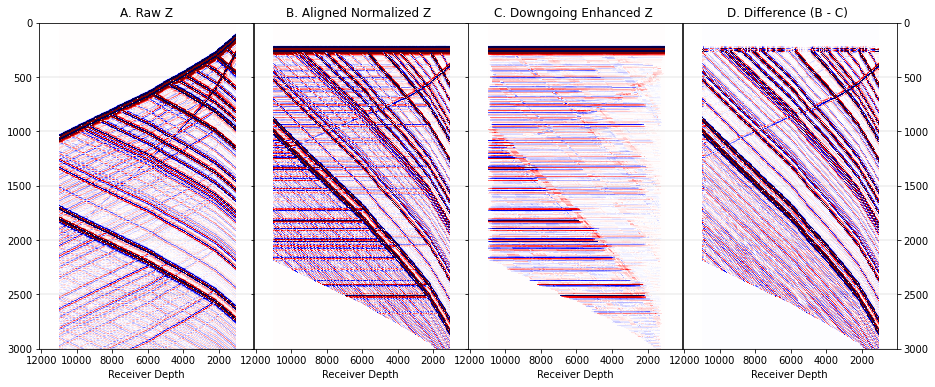

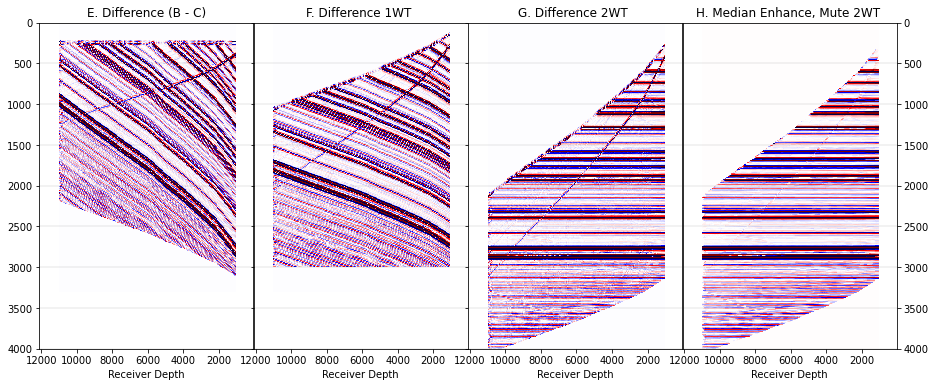

In [28]:
########## make thumbnail processing plots 
    
plot4_params = {    
    'ss_title1' : "A. Raw Z",    
    'ss_title2' : "B. Aligned Normalized Z",    
    'ss_title3' : "C. Downgoing Enhanced Z",    
    'ss_title4' : "D. Difference (B - C)",    
    'savePNG' : 'y',    
    'png_name' : 'pre_decon',        
    'scalar' : [100,20,20,8],             # scaling to plot 1,2,3,4 amplitudes    
    'time_range' : [0, 3000],    
    'depth_range' : [12100, 50],
    'info_gray4' : 'n'}
four_plots(data_edit, alignedVSP, aligndown_scipy, residual, fs, 
               theader_edit, **plot4_params)
plot4_params = {   
    'ss_title1' : "E. Difference (B - C)",    
    'ss_title2' : "F. Difference 1WT",    
    'ss_title3' : "G. Difference 2WT",    
    'ss_title4' : "H. Median Enhance, Mute 2WT",
    'savePNG' : 'y',        
    'png_name' : 'pre_decon_enh',    
    'scalar' : [10,10,10,10,4],            # scaling to plot 1,2,3,4, amplitudes    
    'time_range' : [0, 4000],    
    'depth_range' : [12100, 50],
    'info_gray4' : 'n'}
four_plots(residual, upwave1WT, upwave2WT, mute_medianup2WT, fs, 
               theader_edit, **plot4_params)
    

## Write outputs to SEG-Y  
Uses segyio package to write out SEG-Y files  
The output directories have to exist
 - using the full path may be necessary

In [29]:
###########  output segy 

'''
outfilename = ('C:\\Users\\acampbell45\\Documents\\Python_Scripts'
                  '\\Synthetic_data\\data\\residual_2wt.sgy')
    
outfilename2 = ('C:\\Users\\acampbell45\\Documents\\Python_Scripts'
              '\\Synthetic_data\\data\\down_flat.sgy')
'''    
outfilename = ('data\\residual_2wt.sgy')    
outfilename2 = ('data\\down_flat.sgy')    
  
write_segyio(mute_medianup2WT, theader_2wt, fs, outfilename)    
write_segyio(aligndown_scipy, theader_edit, fs, outfilename2)



̲W̲r̲i̲t̲e̲ ̲S̲e̲g̲y̲i̲o̲ ̲S̲t̲a̲t̲s̲ ̲:
Data shape [0] : 200 Data shape [1] : 5542
Trace header shape (200, 17)
time header : [[ 2.00000000e+01  1.05000000e+03  1.05000000e+03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+01
   1.42790000e+02  1.05000000e+03  1.04000000e+03 -1.00000000e+01
   1.00000000e+00  1.10000000e+01  0.00000000e+00  2.85580000e+02
   7.10227273e+03]
 [ 2.10000000e+01  1.10000000e+03  1.10000000e+03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+01
   1.49840000e+02  1.10000000e+03  1.09000000e+03 -1.00000000e+01
   1.00000000e+00  1.10000000e+01  0.00000000e+00  2.99680000e+02
   7.09219858e+03]]
MD shape : (200,)  MD dtype : int32
 MD [1:10] : [10500 11000 11500 12000 12500 13000 13500 14000 14500 15000]  TVD[0:10] : [10500 11000 11500 12000 12500 13000 13500 14000 14500 15000]
 spec.tracecount : 200

̲W̲r̲i̲t̲e̲ ̲S̲e̲g̲y̲i̲o̲ ̲S̲t̲a̲t̲s̲ ̲:
Data shape [0] : 200 Data shape [1] : 3300
Trace heade